## Classifying Movie Reviews

In [1]:
# Loading Datasets
from keras.datasets import imdb

(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

In [2]:
#train_data[0]

In [3]:
 train_labels[0]  # 0 if negative review 1 if positive

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
# Preparing Data
import numpy as np

def vectorize_sequences(sequence,dimension=10000):
    results=np.zeros((len(sequence),dimension))
    for i,sequence in enumerate(sequence):
        results[i,sequence]=1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
print(x_train[0])
print(y_train[0])

[0. 1. 1. ... 0. 0. 0.]
1.0


In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Input(shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
# Compiling the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
# # Configure the optimizer
# from keras import optimizers

# model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

In [10]:
# # Using custom losses and metrices
# from keras import losses
# from keras import metrics
# model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [11]:
# Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
# Training the model

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, 
                    epochs=20, batch_size=512, 
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.7016 - loss: 0.5942 - val_accuracy: 0.8643 - val_loss: 0.3948
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8878 - loss: 0.3439 - val_accuracy: 0.8817 - val_loss: 0.3149
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9212 - loss: 0.2454 - val_accuracy: 0.8750 - val_loss: 0.3091
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9357 - loss: 0.1982 - val_accuracy: 0.8821 - val_loss: 0.2897
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9482 - loss: 0.1656 - val_accuracy: 0.8864 - val_loss: 0.2770
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9582 - loss: 0.1396 - val_accuracy: 0.8821 - val_loss: 0.3000
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9663 - loss: 0.1167 - val_accuracy: 0.8834 - val_loss: 0.2963
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9718 - loss: 0.1015 - val_accuracy: 0.8686 - 

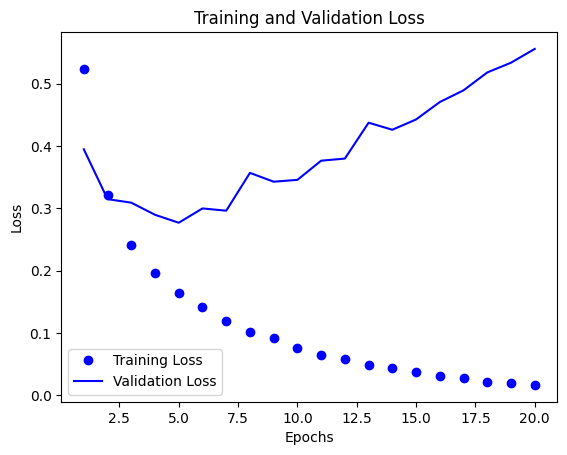

In [18]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')  
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')  
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


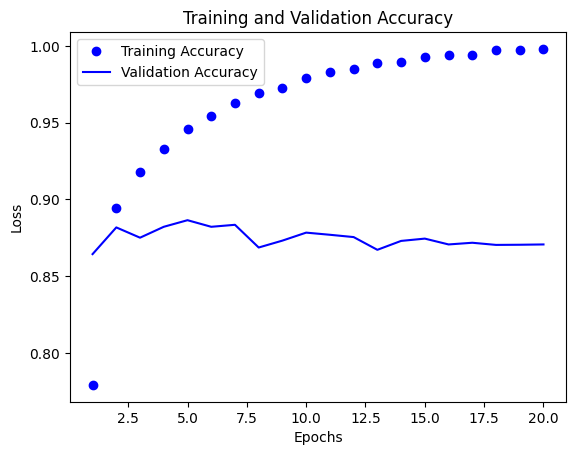

In [23]:
# Plotting the training and validation accuracy
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')  
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')  
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
#Testing the test_data
results = model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8549 - loss: 0.6126


In [25]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


array([[0.0153183 ],
       [0.99999774],
       [0.97196037],
       ...,
       [0.00450658],
       [0.01560021],
       [0.97391987]], dtype=float32)

In [26]:
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)